In [1]:
from utils.cargar import df_caso

In [2]:
df_laura = df_caso('laura')
df_julieta = df_caso('julieta')
df_adela = df_caso('adela')
df_alicia = df_caso('alicia')

In [3]:
def remove_na(df,verbose=False):
    df_new = df[df['comment'].notna()]
    if verbose:
        print("Cantidad de respuestas con texto: {}".format(len(df_new)))
    return df_new

def remove_7scale(df,verbose=False):
    gt7 = len(df[df['max_num'] > 6])
    if verbose:
        prt = "{:.2f}".format(100*gt7/len(df))
        print("Cantidad de columnas con max_num > 6 = {} ({}%)".format(gt7,prt))
    return df.drop(df[df['max_num'] > 6].index)
    

In [4]:
def wrap_lengths(df):
    lengths = [len(df)]

    df = remove_na(df)
    lengths.append(len(df))

    df = remove_7scale(df)
    lengths.append(len(df))

    return df, lengths

In [5]:
df_laura, laura_len = wrap_lengths(df_laura)
df_julieta, julieta_len = wrap_lengths(df_julieta)
df_adela, adela_len = wrap_lengths(df_adela)
df_alicia, alicia_len = wrap_lengths(df_alicia)

In [9]:
data

[[4978, 4429, 4067],
 [5095, 5061, 4806],
 [7717, 7638, 6579],
 [12397, 12317, 9991]]

In [10]:
original_list = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

transposed_list = list(map(list, zip(*original_list)))

# Print the transposed list
for row in transposed_list:
    print(row)


[1, 4, 7]
[2, 5, 8]
[3, 6, 9]


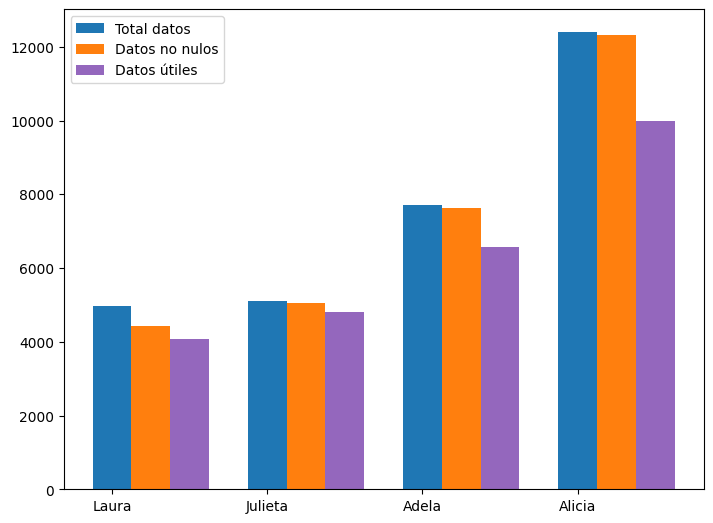

In [16]:
import numpy as np
import matplotlib.pyplot as plt

data = [laura_len,
        julieta_len,
        adela_len,
        alicia_len]

data = list(map(list, zip(*data)))

X = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

group_labels = ['Laura', 'Julieta', 'Adela', 'Alicia']

ax.bar(X + 0.00, data[0], color = 'tab:blue', width = 0.25, label='Total datos')
ax.bar(X + 0.25, data[1], color = 'tab:orange', width = 0.25, label='Datos no nulos')
ax.bar(X + 0.50, data[2], color = 'tab:purple', width = 0.25, label='Datos útiles')

ax.set_xticks(X)
ax.set_xticklabels(group_labels)

plt.legend();

In [ ]:
def visualise(df,caso,izq,der):
    return

In [28]:
from utils.cargar import fase

data = []

for etapa in ['Ind1','Grup','Ind2']:
    data_ind = []
    for i in [1,2,3,4,5,6]:
        try:
            data_ind.append(fase(df_alicia,etapa,'alicia')['sel'].value_counts()[i])
        except KeyError:
            data_ind.append(0)
    data.append(data_ind)
        

# [[fase(df_alicia,etapa,'alicia')['sel'].value_counts()[i] for i in ['1,2,3,4,5']] for etapa in ['Ind1','Grup','Ind2']]
data

[[619, 1187, 594, 494, 572, 247],
 [420, 893, 479, 236, 175, 25],
 [250, 587, 318, 208, 200, 43]]

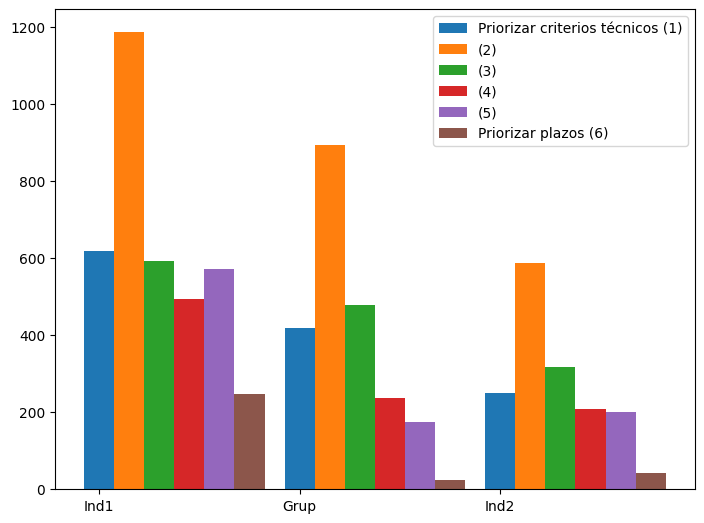

In [43]:
data = []

for etapa in ['Ind1','Grup','Ind2']:
    data_ind = []
    for i in [1,2,3,4,5,6]:
        try:
            data_ind.append(fase(df_alicia,etapa,'alicia')['sel'].value_counts()[i])
        except KeyError:
            data_ind.append(0)
    data.append(data_ind)
        
data

data = list(map(list, zip(*data)))

X = np.arange(3)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

group_labels = ['Ind1', 'Grup', 'Ind2']

ax.bar(X + 0.00, data[0], color = 'tab:blue', width = 0.15, label='Priorizar criterios técnicos (1)')
ax.bar(X + 0.15, data[1], color = 'tab:orange', width = 0.15, label='(2)')
ax.bar(X + 0.30, data[2], color = 'tab:green', width = 0.15, label='(3)')
ax.bar(X + 0.45, data[3], color = 'tab:red', width = 0.15, label='(4)')
ax.bar(X + 0.60, data[4], color = 'tab:purple', width = 0.15, label='(5)')
ax.bar(X + 0.75, data[5], color = 'tab:brown', width = 0.15, label='Priorizar plazos (6)')

ax.set_xticks(X)
ax.set_xticklabels(group_labels)

plt.legend();